In [1]:
import pandas as pd

# Load the CSV file to check its structure
file_path = '/storage/data1/marmi/annotation_project/crohn/coli1/pangenome/results/gene_presence_absence.csv'
data = pd.read_csv(file_path)

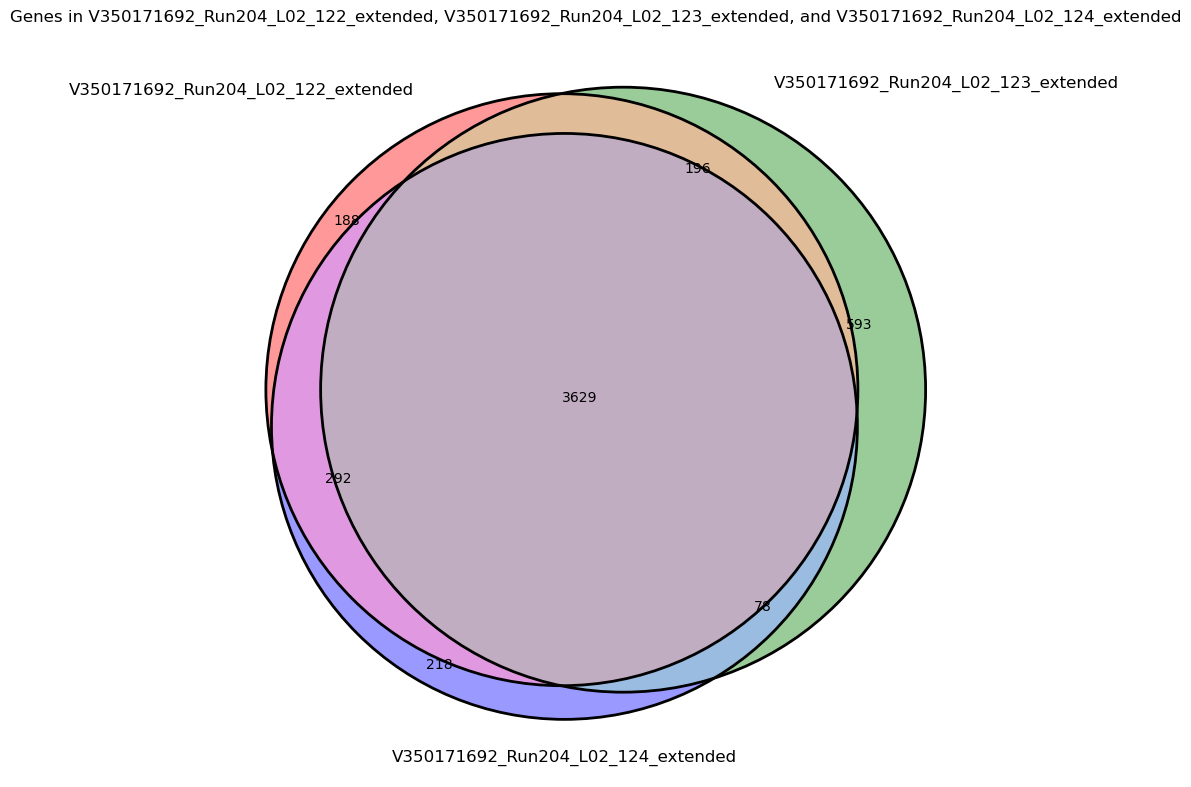

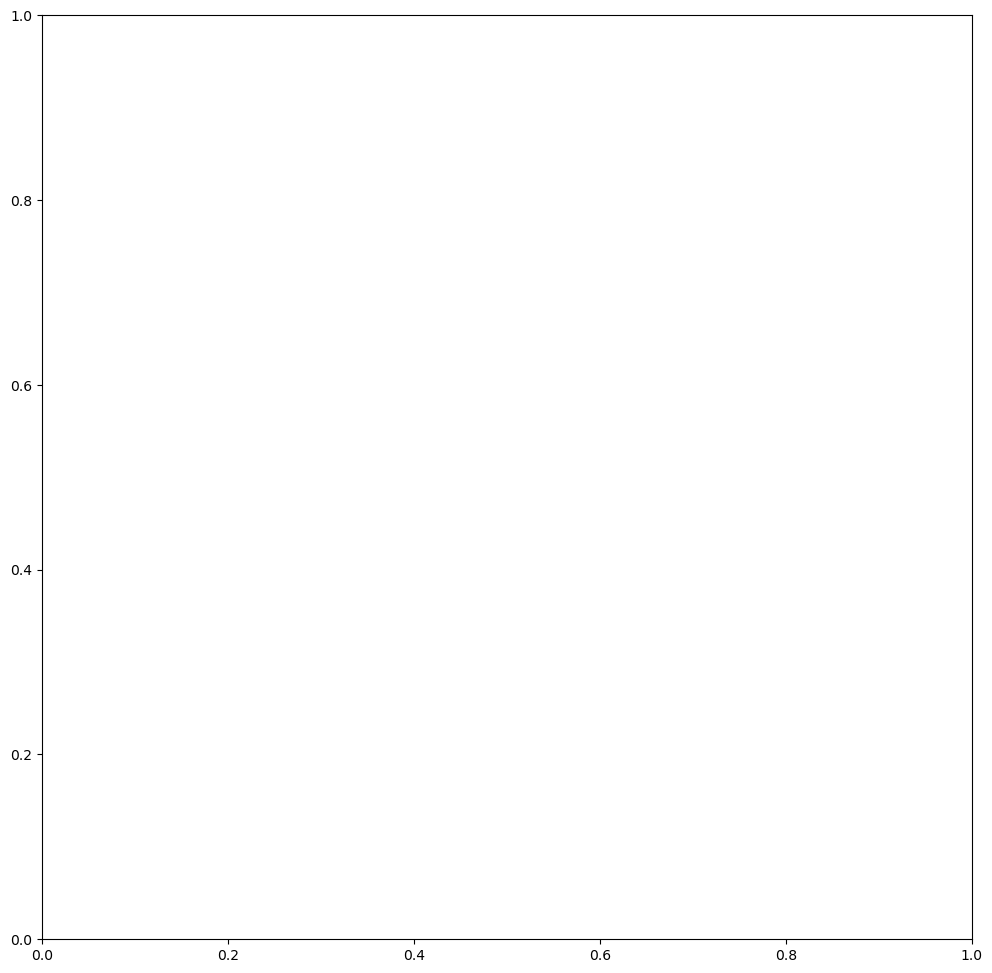

In [6]:
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
import matplotlib.pyplot as plt

# Extract the presence-absence data for the first 5 samples
samples = data.columns[4:9]

# Create sets of genes for each sample
gene_sets = {sample: set(data['Gene'][data[sample].notnull()]) for sample in samples}

# Visualize the Venn diagram (if there are more than 3 samples, we'll need a specific approach)
if len(samples) == 3:
    venn = venn3([gene_sets[sample] for sample in samples], samples)
    venn3_circles([gene_sets[sample] for sample in samples])
elif len(samples) == 2:
    venn = venn2([gene_sets[sample] for sample in samples], samples)
    venn2_circles([gene_sets[sample] for sample in samples])
else:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    venn = venn3([gene_sets[samples[0]], gene_sets[samples[1]], gene_sets[samples[2]]], (samples[0], samples[1], samples[2]))
    venn3_circles([gene_sets[samples[0]], gene_sets[samples[1]], gene_sets[samples[2]]])
    ax.set_title(f'Genes in {samples[0]}, {samples[1]}, and {samples[2]}')
    plt.show()

fig, ax = plt.subplots(figsize=(12, 12))

if len(samples) == 5:
    venn = venn3([gene_sets[samples[0]], gene_sets[samples[1]], gene_sets[samples[2]]], set_labels=samples[:3])
    venn3_circles([gene_sets[samples[0]], gene_sets[samples[1]], gene_sets[samples[2]]])
    plt.title(f'Genes in {samples[0]}, {samples[1]}, and {samples[2]}')

plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet

In [15]:
infile = "/storage/data1/marmi/annotation_project/crohn/matrix/presence_absence_matrix.tsv"

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

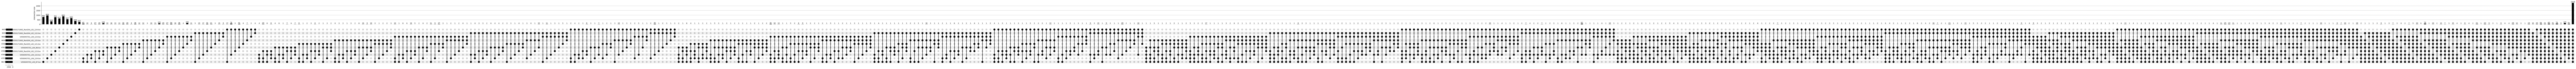

In [16]:
file_path = infile
data = pd.read_csv(file_path, sep = '\t', index_col=0)
data.columns = [i.replace("_extended", "") for i in data.columns]

group_dict={}

for index,row  in data.iterrows():
    for sp,count in row.items():
        if count != 0:
            group_dict.setdefault(index, []).append(sp)

import upsetplot
from upsetplot import UpSet
from upsetplot import from_memberships

        
x=from_memberships(group_dict.values()).sort_values(ascending= False)
upsetplot.plot(x, subset_size='count', show_counts=True)

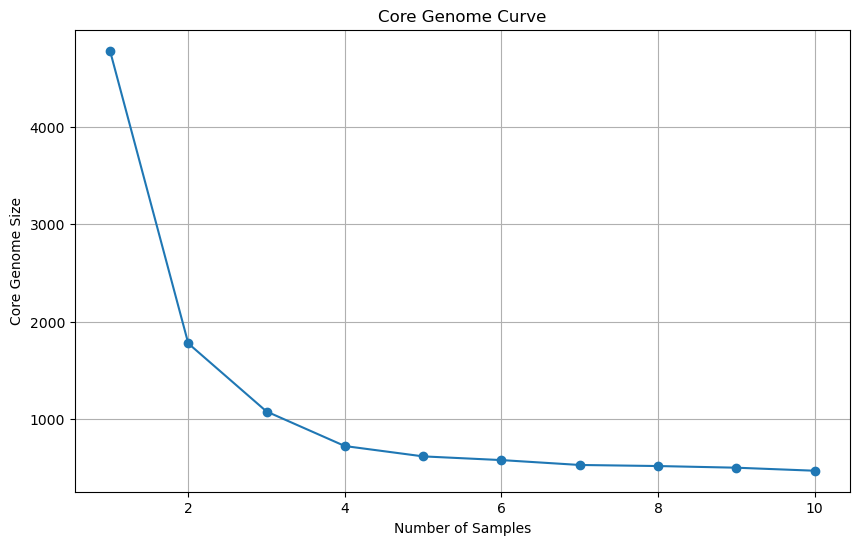

In [11]:
# Step 3: Define a function to calculate core genome size
def calculate_core_genome(df):
    sample_count = []
    core_genome_size = []

    for i in range(1, len(df.columns) + 1):
        subset = df.iloc[:, :i]
        core_genes = subset.sum(axis=1) == i
        core_genome_size.append(core_genes.sum())
        sample_count.append(i)

    return sample_count, core_genome_size

# Step 4: Calculate core genome sizes
sample_count, core_genome_size = calculate_core_genome(data)

# Step 5: Plot the core genome curve
plt.figure(figsize=(10, 6))
plt.plot(sample_count, core_genome_size, marker='o', linestyle='-')
plt.xlabel('Number of Samples')
plt.ylabel('Core Genome Size')
plt.title('Core Genome Curve')
plt.grid(True)
plt.show()

In [12]:
import itertools

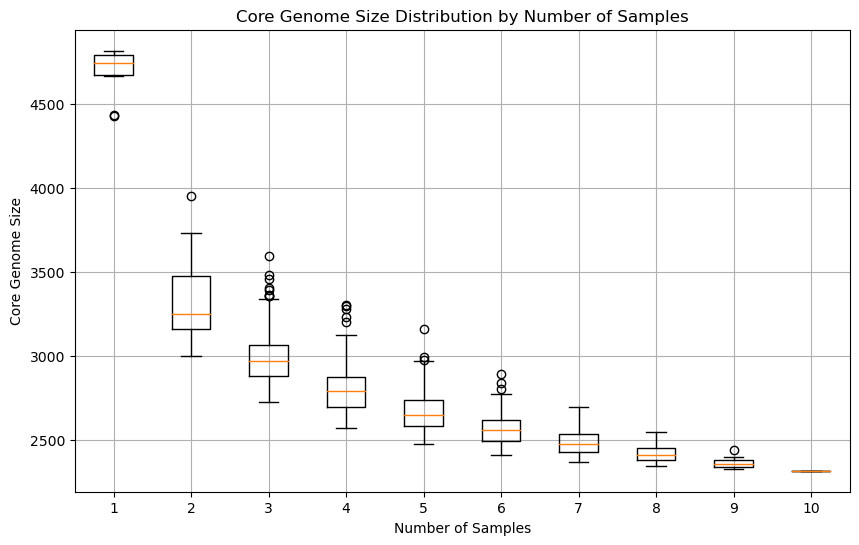

In [17]:
# Step 3: Define a function to calculate core genome size for all combinations
def calculate_core_genome_combinations(df):
    core_genome_sizes = {i: [] for i in range(1, len(df.columns) + 1)}
    
    for i in range(1, len(df.columns) + 1):
        for combo in itertools.combinations(df.columns, i):
            subset = df[list(combo)]
            core_genes = subset.sum(axis=1) == i
            core_genome_sizes[i].append(core_genes.sum())
    
    return core_genome_sizes

# Step 4: Calculate core genome sizes for all combinations
core_genome_sizes = calculate_core_genome_combinations(data)

# Step 5: Prepare data for boxplot
boxplot_data = [core_genome_sizes[i] for i in range(1, len(data.columns) + 1)]

# Step 6: Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[str(i) for i in range(1, len(data.columns) + 1)])
plt.xlabel('Number of Samples')
plt.ylabel('Core Genome Size')
plt.title('Core Genome Size Distribution by Number of Samples')
plt.grid(True)
plt.show()

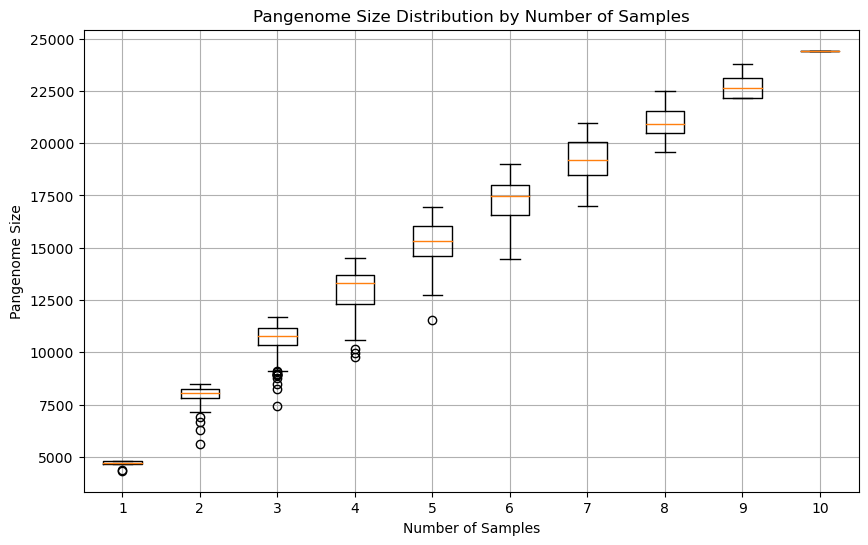

In [7]:

# Step 3: Define a function to calculate pangenome size for all combinations
def calculate_pangenome_combinations(df):
    pangenome_sizes = {i: [] for i in range(1, len(df.columns) + 1)}
    
    for i in range(1, len(df.columns) + 1):
        for combo in itertools.combinations(df.columns, i):
            subset = df[list(combo)]
            pangenome_genes = subset.sum(axis=1) > 0
            pangenome_sizes[i].append(pangenome_genes.sum())
    
    return pangenome_sizes

# Step 4: Calculate pangenome sizes for all combinations
pangenome_sizes = calculate_pangenome_combinations(data)

# Step 5: Prepare data for boxplot
boxplot_data = [pangenome_sizes[i] for i in range(1, len(data.columns) + 1)]

# Step 6: Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[str(i) for i in range(1, len(data.columns) + 1)])
plt.xlabel('Number of Samples')
plt.ylabel('Pangenome Size')
plt.title('Pangenome Size Distribution by Number of Samples')
plt.grid(True)
plt.show()